<a href="https://colab.research.google.com/github/LudovicaCi/CIDL_Project/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Visualization**


# Import

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
from tqdm import tqdm
import seaborn as sns
from sklearn.utils import resample

# Upload dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# setup directory for training and test dataset
train_path = '/content/drive/Shareddrives/Cocchella_Cantini/Dataset/train'
test_path = '/content/drive/Shareddrives/Cocchella_Cantini/Dataset/test'

In [ ]:
# Create a dictionary to map class indices to class names
classes = {
    0: 'angry',
    1: 'disgusted',
    2: 'fearful',
    3: 'happy',
    4: 'neutral',
    5: 'sad',
    6: 'surprised'
}

# Analyse Dataset

In [ ]:
import os

def count_files_in_directory(directory_path):
    total_files = 0

    for root, dirs, files in os.walk(directory_path):
        total_files += len(files)

    return total_files



total_files_count = count_files_in_directory(train_path)
print(f"Number of train files: {total_files_count}")


total_files_count = count_files_in_directory(test_path)
print(f"Number of test files: {total_files_count}")


Number of train files: 28709
Number of test files: 7178


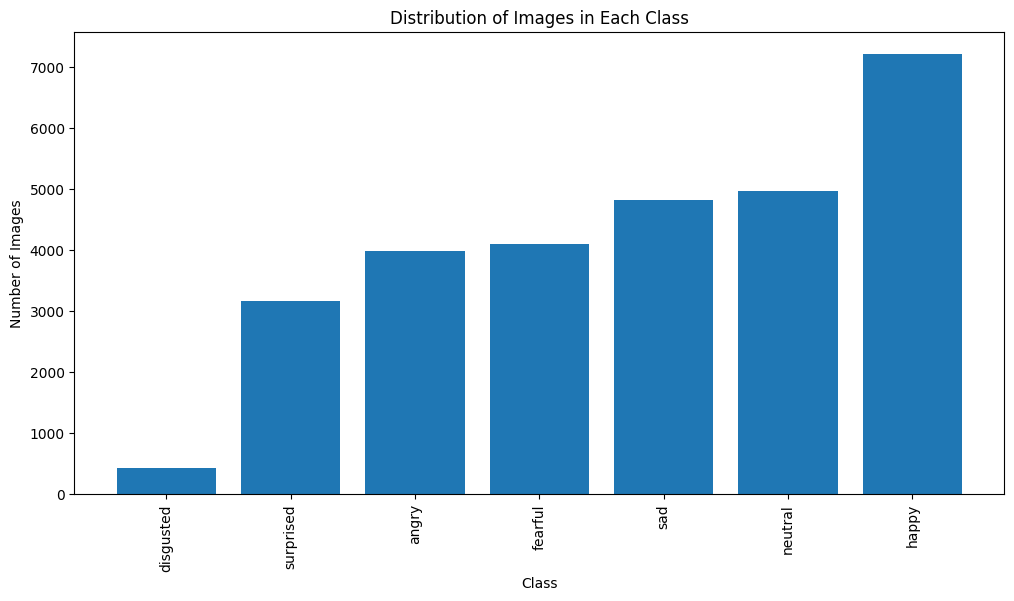

In [ ]:
# We'll see the distribution of our classes in the training set
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
        train_files_1 = os.listdir(os.path.join(train_path, folder))
        train_number.append(len(train_files_1))
        class_num.append(classes[int(folder)])

# Sorting the dataset on the basis of the number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
sorted_class_num = [item[1] for item in sorted_pairs]
sorted_train_number = [item[0] for item in sorted_pairs]

# Plotting the number of images in each class
plt.figure(figsize=(12, 6))
plt.bar(sorted_class_num, sorted_train_number)
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Distribution of Images in Each Class")
plt.xticks(rotation='vertical')
plt.show()

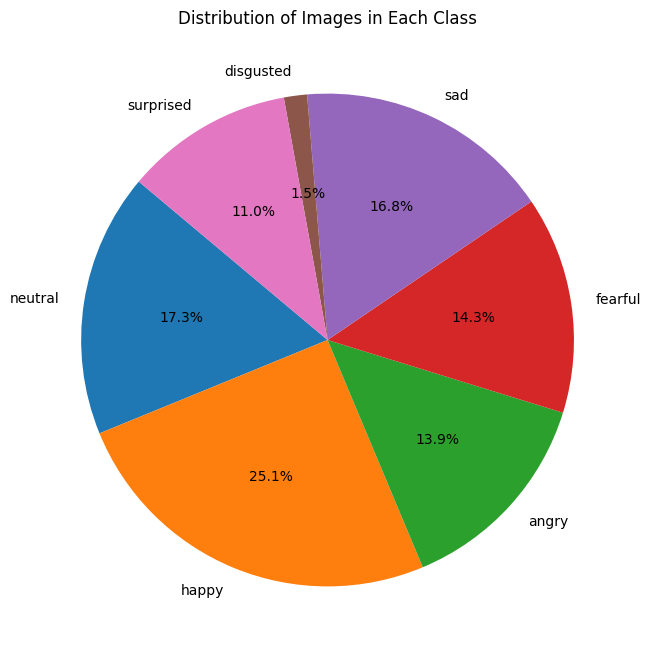

In [ ]:
# Calculate the total number of images
total_images = sum(train_number)

# Calculate the percentage of images in each class
percentages = [count / total_images * 100 for count in train_number]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=class_num, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Images in Each Class")
plt.show()


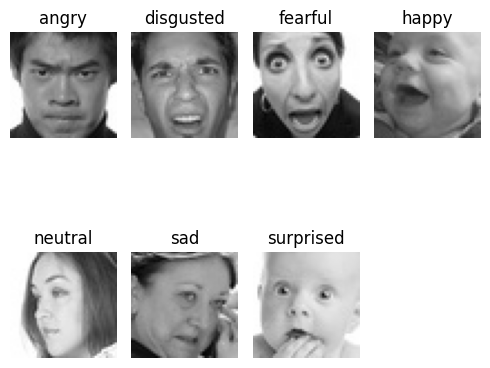

(48, 48, 3)


In [ ]:
# Create a subplot for each class
plt.figure(figsize=(5, 5))
for class_index in classes.keys():
    class_name = classes[class_index]
    class_folder = os.path.join(train_path, str(class_index))
    class_images = os.listdir(class_folder)

    # Select a random image from the class
    random_image = random.choice(class_images)
    image_path = os.path.join(class_folder, random_image)

    # Load and display the images
    image = cv2.imread(image_path)
    # Converte l'immagine da BGR a RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 4, class_index + 1)
    plt.imshow(image_rgb)
    plt.title(class_name)
    plt.axis('off')

plt.tight_layout()
plt.show()

print(image_rgb.shape)